# SINGLE LAYER NEURAL NETWORK IN PYTHON FROM SCRATCH

In [17]:
import numpy as np
import util_mnist_reader
import pandas
X_train, y_train = util_mnist_reader.load_mnist('C://Users//lenovo//jupyter_workspace//data//fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('C://Users//lenovo//jupyter_workspace//data//fashion', kind='t10k')
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def softmax(A):
    A = np.exp(A)
    return A/A.sum(axis=1,keepdims=True)

In [18]:
X_train=np.asarray(X_train)
X_train=X_train/255.0
y_train=np.asarray(y_train)
actual_y=y_train
y_train=np.asarray(y_train)
y_train = pandas.get_dummies(y_train)
y_train=np.asarray(y_train)
print(actual_y)

X_test=np.asarray(X_test)
X_test=X_test/255.0
y_test=np.asarray(y_test)
actual_y_test=y_test
y_test=np.asarray(y_test)
y_test = pandas.get_dummies(y_test)
y_test=np.asarray(y_test)
print(actual_y_test)

X=X_train
T=y_train
T.shape

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


(60000, 10)

In [19]:
def forwardpropogation(X,W1,b1,W2,b2):
    A = sigmoid(X.dot(W1) + b1) 
    Y = softmax(A.dot(W2) + b2) 
    return A,Y  

In [20]:
def backwardpropogation(Y,T,W2,A):
    d2 = (Y - T)
    d1 = ((d2).dot(W2.T) * A * (1 - A))
    return d2,d1  

In [21]:
def update_weights_and_bias(A,T,delta2,alpha,X,delta1,W2,W1,b2,b1):
    W2 -= alpha * A.T.dot(delta2)
    b2 -= alpha * (delta2).sum(axis=0)
    W1 -= alpha * X.T.dot(delta1)
    b1 -= alpha * (delta1).sum(axis=0)
    return W2,b2,W1,b1

In [33]:
def cal_acc(actual_y,predictions,n):
    acc=sum(actual_y==predictions)/n
    return acc

In [23]:
samples = X.shape[0] 
features = X.shape[1] 
hidden_nodes = 512
num_classes = 10
W1 = np.random.randn(features, hidden_nodes)
b1 = np.random.randn(hidden_nodes)
W2 = np.random.randn(hidden_nodes, num_classes)
b2 = np.random.randn(num_classes)
alpha = 10e-6
costs = []
accuracy= []
n=60000
for epoch in range(200):
    A,Y=forwardpropogation(X,W1,b1,W2,b2)
    delta2,delta1=backwardpropogation(Y,T,W2,A)
    W2,b2,W1,b1=update_weights_and_bias(A,T,delta2,alpha,X,delta1,W2,W1,b2,b1)
    if epoch % 10 == 0:
        loss = -1/60000*np.sum(T * np.log(Y))
        print('value of loss function for ',epoch,' iterations: ', loss)
        costs.append(loss)
        pred = np.argmax(Y, axis=1)
        acc=cal_acc(actual_y,pred,n)
        accuracy.append(acc)
        print('Training Accuracy after ',epoch,' iterations : ',acc)
        #print('\n')

value of loss function for  0  iterations:  33.54435293798401
Training Accuracy after  0  iterations :  0.05333333333333334
value of loss function for  10  iterations:  9.172257931490856
Training Accuracy after  10  iterations :  0.5101
value of loss function for  20  iterations:  4.405898359321259
Training Accuracy after  20  iterations :  0.5645166666666667
value of loss function for  30  iterations:  3.0696336884121513
Training Accuracy after  30  iterations :  0.66485
value of loss function for  40  iterations:  3.136598956339599
Training Accuracy after  40  iterations :  0.68955
value of loss function for  50  iterations:  2.9001881247692523
Training Accuracy after  50  iterations :  0.6861333333333334
value of loss function for  60  iterations:  2.816224859254696
Training Accuracy after  60  iterations :  0.6860666666666667
value of loss function for  70  iterations:  2.6375588224859086
Training Accuracy after  70  iterations :  0.6877333333333333
value of loss function for  80  

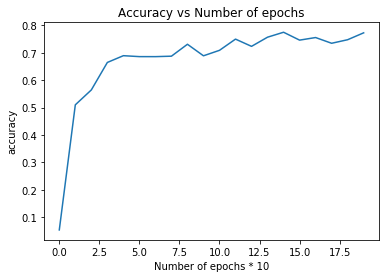

In [54]:
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.title("Accuracy vs Number of epochs")
plt.xlabel("Number of epochs * 10")
plt.ylabel("accuracy")
plt.show()


In [62]:
print('Training Accuracy :',accuracy[-1]*100)

Training Accuracy : 77.30166666666666


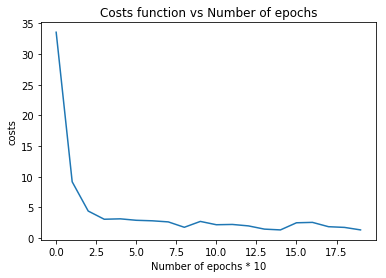

In [59]:
plt.plot(costs)
plt.title("Costs function vs Number of epochs")
plt.xlabel("Number of epochs * 10")
plt.ylabel("costs")
plt.show()

In [58]:
test_samples = X_test.shape[0]
#print(test_samples)
A_test,Y_tests=forwardpropogation(X_test,W1,b1,W2,b2)
pred = np.argmax(Y_tests, axis=1)
acc=cal_acc(actual_y_test,pred,test_samples)
print("Test Accuracy :", acc*100)

Test Accuracy : 71.7


In [36]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(actual_y_test, pred)
matrix

array([[641,   7,   0,   8,  32,   4, 290,   1,  17,   0],
       [ 12, 935,   0,  14,  23,   2,   9,   1,   4,   0],
       [ 21,  11,  48,   3, 415,   2, 486,   0,  13,   1],
       [ 68,  77,   2, 506, 132,   1, 193,   0,  21,   0],
       [  3,   4,   0,   5, 841,   2, 137,   0,   8,   0],
       [  4,   1,   0,   2,   2, 853,  10,  73,  14,  41],
       [ 85,   4,   8,   7, 175,   5, 686,   0,  29,   1],
       [  1,   0,   0,   0,   1,  65,   0, 871,   4,  58],
       [ 12,   2,   0,   5,  21,  18,  56,   4, 878,   4],
       [  1,   0,   0,   0,   1,  24,   1,  56,   6, 911]], dtype=int64)

# MULTILAYER NEURAL NETWORK WITH KERAS

In [37]:
from keras.models import Sequential
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.layers import Dense
import numpy as np
import util_mnist_reader as mnist_reader
import matplotlib.pyplot as plt
x_train, y_train = mnist_reader.load_mnist('C://Users//lenovo//jupyter_workspace//data//fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('C://Users//lenovo//jupyter_workspace//data//fashion', kind='t10k')

C:\Users\lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train[0].shape

(60000, 784)
(60000,)
(10000, 784)
(10000,)


(784,)

In [39]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', restore_best_weights= True)

In [40]:
ker = Sequential()
ker.add(Dense(128,activation = 'relu',input_shape=(784,)))
ker.add(Dense(64,activation = 'sigmoid'))
ker.add(Dense(10,activation = 'softmax'))
ker.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
ker.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = ker.fit(x_train,y_train, epochs = 100, validation_data = (x_test,y_test), callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 15s 253us/step - loss: 0.5296 - accuracy: 0.8168 - val_loss: 0.4321 - val_accuracy: 0.8421
Epoch 2/100
60000/60000 [==============================] - 12s 202us/step - loss: 0.3713 - accuracy: 0.8637 - val_loss: 0.3777 - val_accuracy: 0.8651
Epoch 3/100
60000/60000 [==============================] - 16s 260us/step - loss: 0.3305 - accuracy: 0.8784 - val_loss: 0.3570 - val_accuracy: 0.8673
Epoch 4/100
60000/60000 [==============================] - 13s 212us/step - loss: 0.3081 - accuracy: 0.8857 - val_loss: 0.3642 - val_accuracy: 0.8675
Epoch 5/100
60000/60000 [==============================] - 11s 189us/step - loss: 0.2884 - accuracy: 0.8932 - val_loss: 0.3425 - val_accuracy: 0.8764
Epoch 6/100
60000/60000 [==============================] - 14s 229us/step - loss: 0.2758 - accuracy: 0.8968 - val_loss: 0.3355 - val_accuracy: 0.8774
Epoch 7/100
60000/60000 [=========================

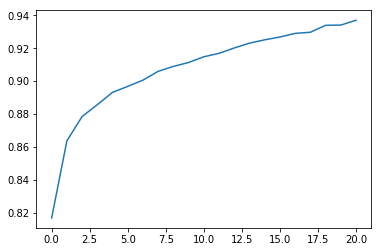

In [64]:
plt.plot(history.history['accuracy'])

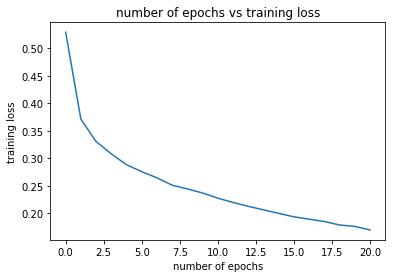

In [65]:

plt.title('number of epochs vs training loss')
plt.xlabel('number of epochs')
plt.ylabel('training loss')
plt.plot(history.history['loss'])


In [48]:
val_score = ker.evaluate(x_test,y_test)
val_score

10000/10000 [==============================] - 1s 84us/step


[0.31474846004247664, 0.8889999985694885]

In [49]:
predict = ker.predict(x_test)
predict

array([[3.06640891e-06, 2.42436909e-06, 1.04612205e-07, ...,
        1.36225403e-03, 4.54146999e-07, 9.98623967e-01],
       [1.78175309e-04, 6.23861425e-08, 9.94553447e-01, ...,
        3.18447547e-07, 2.96408786e-07, 6.65884130e-08],
       [4.33387049e-06, 9.99989629e-01, 1.54185193e-06, ...,
        2.93061220e-08, 1.06779308e-09, 9.58450119e-09],
       ...,
       [1.36634117e-04, 6.35210924e-08, 9.80910481e-05, ...,
        9.82188703e-06, 9.99565065e-01, 5.48445541e-07],
       [5.05768071e-07, 9.99970436e-01, 1.01113824e-06, ...,
        3.40131878e-09, 4.70516293e-09, 7.96657886e-08],
       [1.71210399e-06, 9.04484580e-07, 4.43246518e-06, ...,
        4.42195858e-04, 2.22759127e-06, 3.48123393e-07]], dtype=float32)

In [50]:
y_pred = (predict > 0.5)
y_pred

array([[False, False, False, ..., False, False,  True],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [51]:
confuson_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
confuson_matrix

array([[849,   1,  10,  16,   3,   0, 116,   0,   5,   0],
       [  7, 978,   0,  10,   3,   0,   2,   0,   0,   0],
       [ 63,   2, 750,   9, 115,   0,  60,   0,   1,   0],
       [ 86,   7,   6, 840,  35,   0,  22,   0,   4,   0],
       [ 47,   1,  54,  13, 828,   0,  55,   0,   2,   0],
       [  4,   0,   0,   1,   0, 962,   0,  18,   2,  13],
       [159,   1,  58,  15,  51,   0, 709,   0,   7,   0],
       [  2,   0,   0,   0,   0,  10,   0, 971,   0,  17],
       [ 13,   0,   1,   4,   2,   2,   4,   3, 971,   0],
       [  1,   0,   0,   0,   0,   9,   1,  50,   0, 939]], dtype=int64)

# CONVOLUTIONAL NEURAL NETWORKS

In [1]:
from keras.models import Sequential
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import util_mnist_reader
x_train, y_train = util_mnist_reader.load_mnist('C://Users//lenovo//jupyter_workspace//data//fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('C://Users//lenovo//jupyter_workspace//data//fashion', kind='t10k')

C:\Users\lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto', restore_best_weights= True)

In [3]:
convonn = Sequential()
convonn.add(Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
convonn.add(MaxPooling2D(pool_size=2))
convonn.add(Conv2D(32, kernel_size=2, padding='same', activation='sigmoid'))
convonn.add(MaxPooling2D(pool_size=2))
convonn.add(Flatten())
convonn.add(Dense(128, activation='relu'))
convonn.add(Dense(10, activation='softmax'))
convonn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               200832    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [4]:
convonn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
history = convonn.fit(x_train,y_train, epochs = 50,validation_data = (x_test,y_test), callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 55s 914us/step - loss: 0.6540 - accuracy: 0.7577 - val_loss: 0.4825 - val_accuracy: 0.8262
Epoch 2/50
60000/60000 [==============================] - 40s 665us/step - loss: 0.3859 - accuracy: 0.8585 - val_loss: 0.3773 - val_accuracy: 0.8674
Epoch 3/50
60000/60000 [==============================] - 40s 667us/step - loss: 0.3358 - accuracy: 0.8774 - val_loss: 0.3570 - val_accuracy: 0.8722
Epoch 4/50
60000/60000 [==============================] - 40s 667us/step - loss: 0.3042 - accuracy: 0.8879 - val_loss: 0.3070 - val_accuracy: 0.8839
Epoch 5/50
60000/60000 [==============================] - 40s 665us/step - loss: 0.2841 - accuracy: 0.8954 - val_loss: 0.2962 - val_accuracy: 0.8917
Epoch 6/50
60000/60000 [==============================] - 40s 664us/step - loss: 0.2669 - accuracy: 0.9021 - val_loss: 0.2956 - val_accuracy: 0.8927
Epoch 7/50
60000/60000 [==============================] 

Text(0,0.5,'training loss')

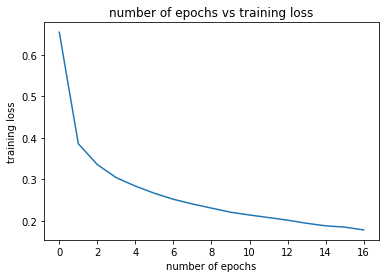

In [6]:
plt.title('number of epochs vs training loss')
plt.plot(history.history['loss'])
plt.xlabel('number of epochs')
plt.ylabel('training loss')

In [8]:
score = convonn.evaluate(x_test,y_test)
predict = convonn.predict(x_test)
y_pred = (predict > 0.5)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

10000/10000 [==============================] - 2s 230us/step


In [9]:
cm

array([[924,   0,  13,   9,   2,   0,  45,   0,   7,   0],
       [ 12, 971,   0,  14,   0,   0,   1,   0,   2,   0],
       [ 52,   0, 853,   5,  47,   0,  43,   0,   0,   0],
       [ 54,   4,  10, 896,  18,   0,  16,   0,   2,   0],
       [ 39,   0,  39,  33, 843,   0,  45,   0,   1,   0],
       [  1,   0,   0,   0,   0, 977,   0,  19,   1,   2],
       [199,   1,  51,  18,  64,   0, 658,   0,   9,   0],
       [  4,   0,   0,   0,   0,   4,   0, 985,   0,   7],
       [ 11,   1,   1,   1,   0,   2,   0,   3, 981,   0],
       [  3,   0,   0,   0,   0,   8,   0,  67,   1, 921]], dtype=int64)